In [2]:
from DR import PCA
import numpy as np
import pandas as pd
from matplotlib.pyplot import *
import utils
import scipy.special as sc
import corner, os, dill
import astropy.convolution as conv
from asy_bkg_fitting import spectrum_fit 

In [11]:
import types

dill._dill._reverse_typemap['ClassType'] = type



KIC6863017
/home/nielsemb/work/repos/granulation/results/KIC6863017/KIC6863017_pca2.sfit


KeyError: 'has_explicit_device'

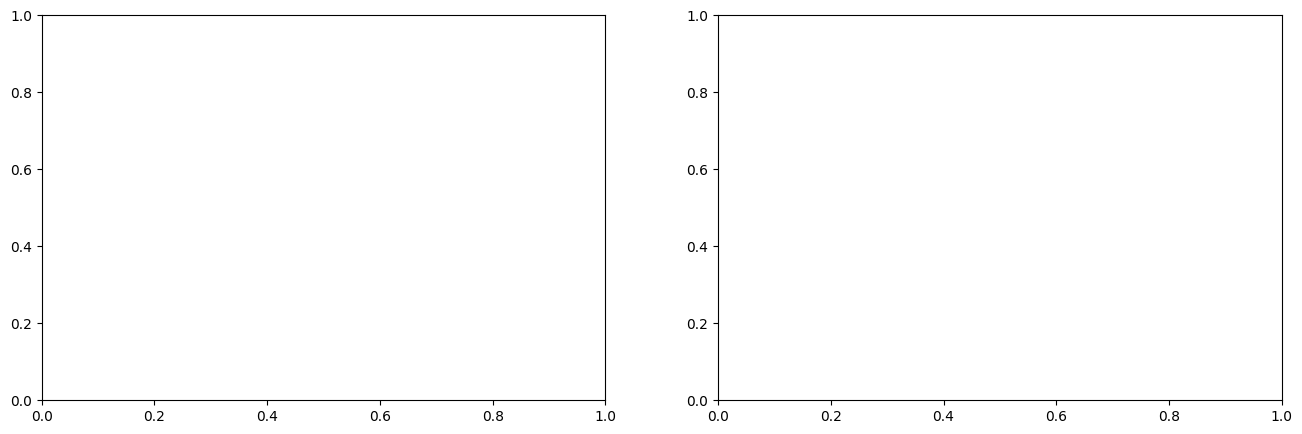

In [12]:
workDir = '/home/nielsemb/work/repos/granulation'

prior_data_fname = os.path.join(*[workDir, 'bkgfit_output_nopca.csv']) 

prior_data = pd.read_csv(prior_data_fname)

tgts = [8657]

ndims = [2, 4, 8, 16]

for i in tgts:
   
    ID = prior_data.loc[i, 'ID']
    print(ID)

    outputDir = os.path.join(*[workDir, 'results', ID])
    
    _numax = prior_data.loc[i, 'numax'] # tgt numax
    
    _dnu = prior_data.loc[i, 'dnu'] # tgt numax
    
    obs = {'numax': [10**_numax, 0.2*10**_numax], 
           'dnu': [10**_dnu, 0]} 
    
    
    for j, ndim in enumerate(ndims):
        
        if ndim == ndims[-1]:
            figM, axM = subplots(1,2,figsize=(16,5.5))
        else:
            figM, axM = subplots(1,2,figsize=(16,5))
        
        ext = f'pca{ndim}'

        sfitpath = os.path.join(*[outputDir, os.path.basename(outputDir) + f'_{ext}.sfit'])
        print(sfitpath)
        if os.path.exists(sfitpath):
   
            with open(sfitpath, 'rb') as dillfile:
                sfit = dill.load(dillfile) 
        else:
            continue    
   
# #         sfit.plotModel(figM, axM, sfit._samples, obs=obs, outputDir=outputDir); 